# Model Training

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings

Import the CSV Data as Pandas DataFrame

In [54]:
data=pd.read_csv('data/stud.csv')

Show Top 5 Records

In [55]:
data.shape

(302, 8)

In [56]:
x=data.drop(columns=['math_score'],axis=1)

In [57]:
x.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,male,group E,bachelor's degree,standard,none,51.0,45.0
1,female,group D,some high school,standard,completed,50.0,76.0
2,female,group D,associate's degree,free/reduced,none,85.0,81.0
3,female,group A,associate's degree,standard,none,82.0,76.0
4,female,group B,associate's degree,standard,completed,99.0,43.0


In [58]:
y=data['math_score']

In [59]:
print(y)

0      97.0
1      49.0
2      87.0
3      57.0
4      96.0
       ... 
297    73.0
298    97.0
299    98.0
300     NaN
301     NaN
Name: math_score, Length: 302, dtype: float64


# Create a Column Transformer with 3 Types of transformers.

In [60]:
# 1. Make sure x is still a DataFrame here
numerical_features = x.select_dtypes(exclude="object").columns
categorical_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 2. Define transformers
numerical_transformer = StandardScaler()
OH_transformer = OneHotEncoder(handle_unknown='ignore')

# 3. Build column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", OH_transformer, categorical_features),
        ("StandardScaler", numerical_transformer, numerical_features),
    ]
)

# 4. Transform data
x_transformed = preprocessor.fit_transform(x)  # Now it's a NumPy array or csr_matrix


In [61]:
x=preproccesor.fit_transform(x)

In [62]:
x.shape

(302, 25)

In [65]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

x_train.shape, x_test.shape


((211, 25), (91, 25))

In [64]:
print(x_train.shape)
print(x_test.shape)

(211, 25)
(91, 25)


In [68]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,rmse,r2

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "Catboost Regressor": CatBoostRegressor(verbose=False),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)    # Train Model
    
    #Make predictions
    
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

In [70]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # or "median", "most_frequent"
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


# Results

In [79]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score


# K Neighbors Regressor

In [ ]:
K_model=KNeighborsRegressor()
K_model=K_model.fit(x_train,y_train)
y_pred=K_model.predict(x_test)
score=r2_score(y_test,y_pred)*100

print("Accuracy for the model = {:.2f}".format(score))

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

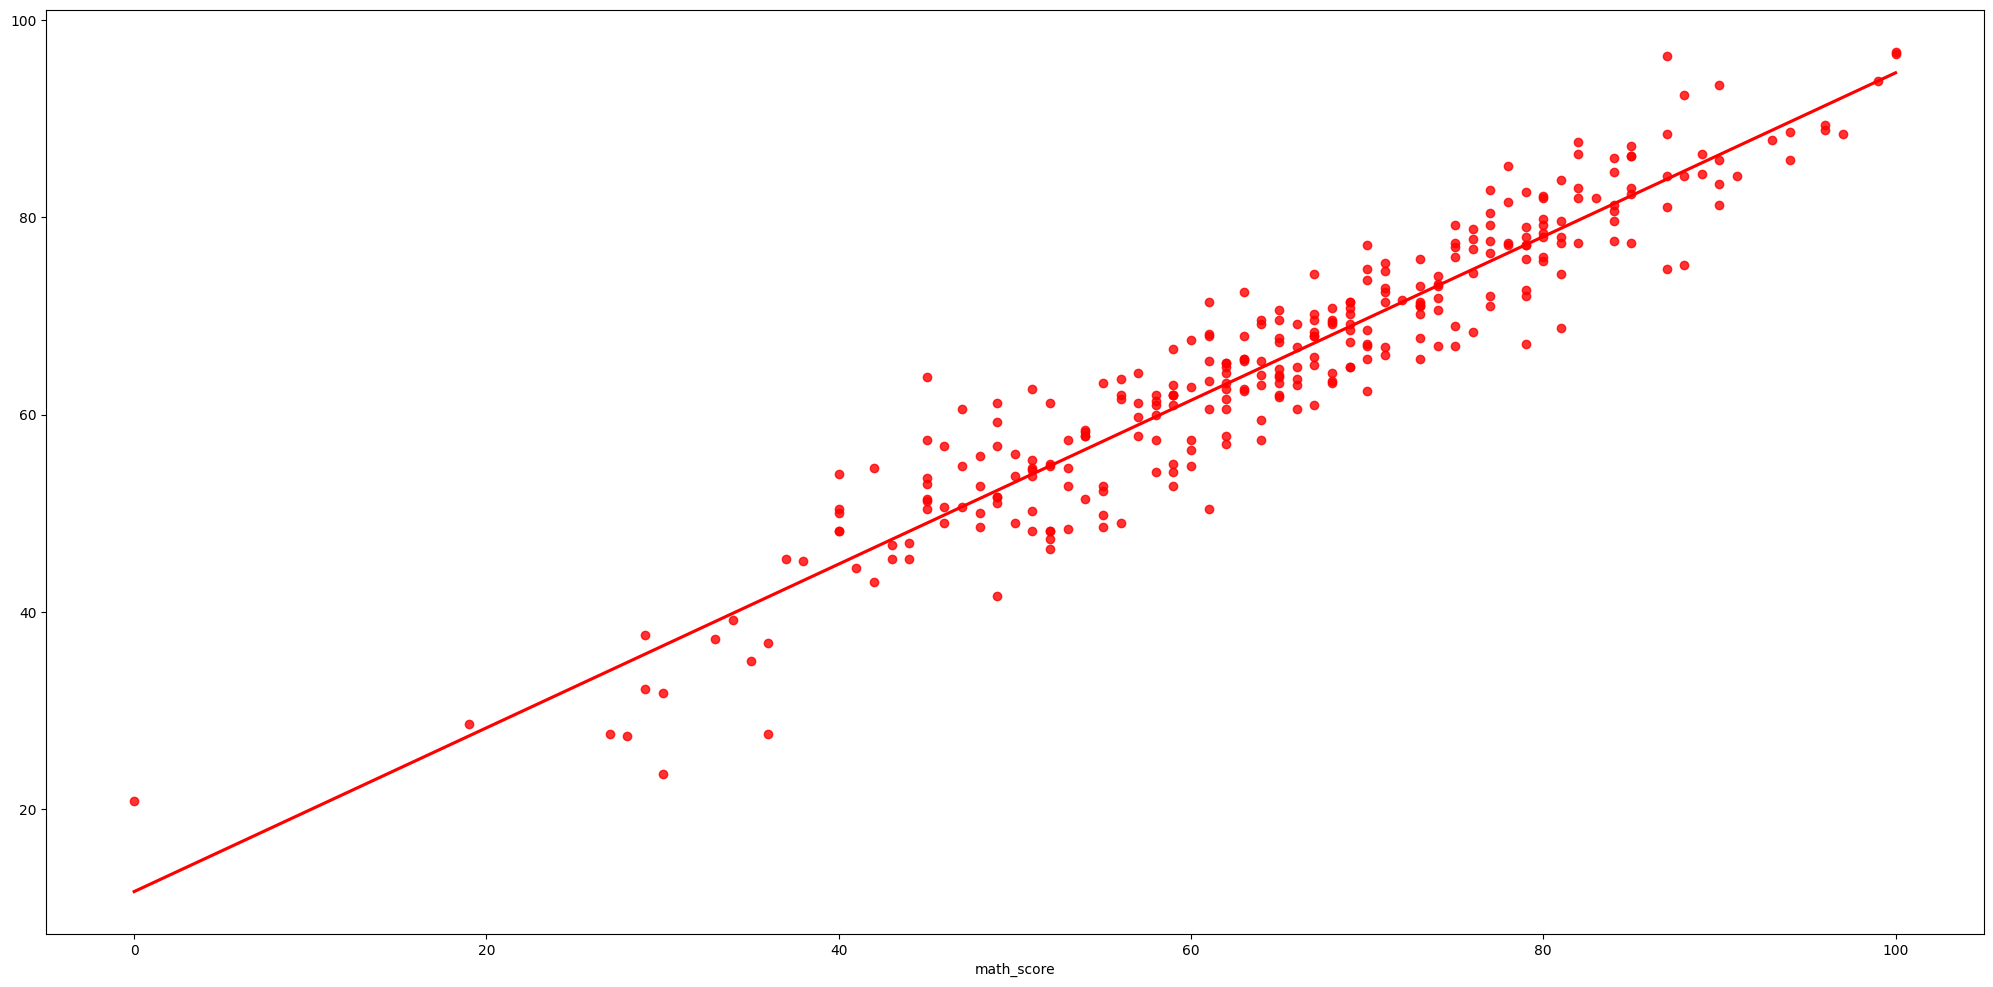

In [44]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

# Difference between Actual and Predicted Values

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df